# Data Exploration


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Load data and Initial Exploration


### Accounts



The accounts table contains company-level information about potential or existing clients. Each row represents a company, including attributes such as sector, year of establishment, estimated annual revenue, number of employees, office location, and any parent company affiliation. This data provides demographic and firmographic context useful for understanding customer profiles and segmenting the market.

In [ ]:
data_accounts = pd.read_csv('../data/raw/accounts.csv').copy()
data_accounts.head()


,account,sector,year_established,revenue,employees,office_location,subsidiary_of
0,Acme Corporation,technolgy,1996,1100.04,2822,United States,NaN
1,Betasoloin,medical,1999,251.41,495,United States,NaN
2,Betatech,medical,1986,647.18,1185,Kenya,NaN
3,Bioholding,medical,2012,587.34,1356,Philipines,NaN
4,Bioplex,medical,1991,326.82,1016,United States,NaN


In [ ]:
print('INFO')
data_accounts.info()


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   account           85 non-null     object 
 1   sector            85 non-null     object 
 2   year_established  85 non-null     int64  
 3   revenue           85 non-null     float64
 4   employees         85 non-null     int64  
 5   office_location   85 non-null     object 
 6   subsidiary_of     15 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 4.8+ KB


In [ ]:
print('\nMissing Values')
data_accounts.isna().sum()



Missing Values


account              0
sector               0
year_established     0
revenue              0
employees            0
office_location      0
subsidiary_of       70
dtype: int64

In [ ]:
print('\nUnique Values')
data_accounts.nunique()



Unique Values


account             85
sector              10
year_established    35
revenue             85
employees           85
office_location     15
subsidiary_of        7
dtype: int64

**Observations on data_accounts**

    No critical missing values: only the subsidiary_of column has 70 missing values → this can be interpreted as "not a subsidiary of another company."

    Each account is unique → likely a primary identifier.

    sector contains 10 distinct categories → a potentially useful categorical variable for segmentation.

    revenue and employees appear to be continuous numerical variables, unique per company.

    year_established has 35 unique values → could be grouped into ranges for age-related analysis.

    office_location has 15 unique values → could be mapped by region or country if grouping is needed.

    subsidiary_of has only 7 unique values → likely names of parent companies. This could be used to identify business groups.


### Data Dictionary

The data_dictionary table provides metadata for the entire dataset. It includes the name of each table, the fields within them, and a brief description of each field’s meaning or purpose. This reference is useful to understand the role of each variable and ensure consistent interpretation during data exploration, preprocessing, and modeling.

In [ ]:
data_dictionary = pd.read_csv('../data/raw/data_dictionary.csv').copy()
data_dictionary.head()


,Table,Field,Description
0,accounts,account,Company name
1,accounts,sector,Industry
2,accounts,year_established,Year Established
3,accounts,revenue,Annual revenue (in millions of USD)
4,accounts,employees,Number of employees


In [ ]:
print('INFO')
data_dictionary.info()


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        21 non-null     object
 1   Field        21 non-null     object
 2   Description  21 non-null     object
dtypes: object(3)
memory usage: 632.0+ bytes


In [ ]:
print('\nMissing Values')
data_dictionary.isna().sum()



Missing Values


Table          0
Field          0
Description    0
dtype: int64

In [ ]:
print('\nUnique Values')
data_dictionary.nunique()



Unique Values


Table           4
Field          18
Description    19
dtype: int64

**Observations on data_dictionary**

    No missing values → the table is complete.
    Contains 21 rows, each describing a field in a table.
    Table has 4 unique values → 4 documented tables.
    Field has 18 unique values → total number of documented fields.
    Description has 19 unique entries → some may be repeated or closely related.
    This table is purely for reference, not used directly for modeling, but essential for:
       - Understanding the meaning of each dataset column.
       - Generating automatic documentation if needed.


### Products

The products table contains information about the company’s product catalog. Each row represents a unique product, including its name, product series (e.g., GTX, MG), and the corresponding sales price. This data can be used to analyze pricing strategies, evaluate deal values, and link product types to sales performance.

In [ ]:
data_products = pd.read_csv('../data/raw/products.csv').copy()
data_products.head()


,product,series,sales_price
0,GTX Basic,GTX,550
1,GTX Pro,GTX,4821
2,MG Special,MG,55
3,MG Advanced,MG,3393
4,GTX Plus Pro,GTX,5482


In [ ]:
print('INFO')
data_products.info()


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   product      7 non-null      object
 1   series       7 non-null      object
 2   sales_price  7 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 296.0+ bytes


In [ ]:
print('\nMissing Values')
data_products.isna().sum()



Missing Values


product        0
series         0
sales_price    0
dtype: int64

In [ ]:
print('\nUnique Values')
data_products.nunique()



Unique Values


product        7
series         3
sales_price    7
dtype: int64

**Observations on data_products**

    No missing values → the table is clean.
    Only 7 products in total → small and manageable dataset.
    series has 3 categories (e.g., GTX, MG…) → likely represent product lines.
    sales_price is numeric with 7 unique values → each product has a distinct price.
    This table will be useful to join with the sales pipeline (sales_pipeline) to analyze:
        -Which products are sold the most?
        -Which series generate the highest revenue?
        -Does price influence conversion rates?


### Sales Pipeline

The sales_pipeline table records individual sales opportunities from the company's CRM system. Each row represents a unique opportunity and includes details such as the sales agent, product involved, customer account, deal stage (e.g., Won, Lost), engagement and close dates, and the final deal value. This dataset is essential for analyzing sales performance, conversion timelines, and agent effectiveness.

In [ ]:
data_sales_pipeline = pd.read_csv('../data/raw/sales_pipeline.csv').copy()
data_sales_pipeline.head()


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0


In [ ]:
print('INFO')
data_sales_pipeline.info()


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   opportunity_id  8800 non-null   object 
 1   sales_agent     8800 non-null   object 
 2   product         8800 non-null   object 
 3   account         7375 non-null   object 
 4   deal_stage      8800 non-null   object 
 5   engage_date     8300 non-null   object 
 6   close_date      6711 non-null   object 
 7   close_value     6711 non-null   float64
dtypes: float64(1), object(7)
memory usage: 550.1+ KB


In [ ]:
print('\nMissing Values')
data_sales_pipeline.isna().sum()



Missing Values


opportunity_id       0
sales_agent          0
product              0
account           1425
deal_stage           0
engage_date        500
close_date        2089
close_value       2089
dtype: int64

In [ ]:
print('\nUnique Values')
data_sales_pipeline.nunique()



Unique Values


opportunity_id    8800
sales_agent         30
product              7
account             85
deal_stage           4
engage_date        421
close_date         306
close_value       2051
dtype: int64

**Observations on data_sales_pipeline**

    There are important missing values:
        account: 1,425 missing → some opportunities may not be assigned to a specific account.
        engage_date, close_date, close_value: around 2,000 missing values → may indicate deals still in progress or not yet closed.
    Opportunity_id is unique per row → clear identifier for each sales opportunity.
    Sales_agent has 30 unique values → could be used to analyze individual performance or grouped by manager (via a join with sales_team).
    Product can be joined with data_products → useful for checking price, product line, and linking to outcomes.
    Deal_stage has 4 unique values → critical categorical variable to model the sales process (e.g., Won, Lost, etc.).
    Engage_date and close_date are still strings (object) and should be converted to datetime for time-based analysis:

### Sales Team

The sales_team table provides organizational information about the company’s sales agents. Each row includes a sales agent’s name, their direct manager, and the regional office they are assigned to. This data can be used to analyze team structures, compare performance across regions, and identify managerial influence on sales outcomes.

In [ ]:
data_sales_team = pd.read_csv('../data/raw/sales_teams.csv').copy()
data_sales_team.head()


,sales_agent,manager,regional_office
0,Anna Snelling,Dustin Brinkmann,Central
1,Cecily Lampkin,Dustin Brinkmann,Central
2,Versie Hillebrand,Dustin Brinkmann,Central
3,Lajuana Vencill,Dustin Brinkmann,Central
4,Moses Frase,Dustin Brinkmann,Central


In [ ]:
print('INFO')
data_sales_team.info()


INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   sales_agent      35 non-null     object
 1   manager          35 non-null     object
 2   regional_office  35 non-null     object
dtypes: object(3)
memory usage: 968.0+ bytes


In [ ]:
print('\nMissing Values')
data_sales_team.isna().sum()



Missing Values


sales_agent        0
manager            0
regional_office    0
dtype: int64

In [ ]:
print('\nUnique Values')
data_sales_team.nunique()



Unique Values


sales_agent        35
manager             6
regional_office     3
dtype: int64

**Observations on data_sales_team**

    No missing values → perfectly clean table.
    35 unique rows, one per sales_agent → matches the expected size of the sales team.
    manager has only 6 unique values → clear hierarchical structure, ideal for performance analysis by leader.
    regional_office has 3 unique values → enables comparisons across geographic regions.
    This table will be useful to join with sales_pipeline via sales_agent in order to:
        -Evaluate which manager or region closes more deals.
        -Detect potential performance disparities between teams.

## Dataset Overview Summary


In [ ]:
def summarize_datasets(datasets_dict):
    summary = []

    for name, df in datasets_dict.items():
        summary.append({
            'Dataset': name,
            'Rows': df.shape[0],
            'Columns': df.shape[1],
            'Missing Values': df.isna().sum().sum(),
            'Duplicated Rows': df.duplicated().sum()
        })

    return pd.DataFrame(summary)


In [ ]:
datasets = {
    'Accounts': data_accounts,
    'Data Disctionary': data_dictionary,
    'Products': data_products,
    'Sales Pipeline': data_sales_pipeline,
    'Sales team': data_sales_team
}

summary_df = summarize_datasets(datasets)
summary_df


,Dataset,Rows,Columns,Missing Values,Duplicated Rows
0,Accounts,85,7,70,0
1,Data Disctionary,21,3,0,0
2,Products,7,3,0,0
3,Sales Pipeline,8800,8,6103,0
4,Sales team,35,3,0,0


# Data Cleaning & Transformation


## Data Sales_pipeline


In [ ]:
# Strip all string columns
for col in data_sales_pipeline.select_dtypes(include='object').columns:
    data_sales_pipeline[col] = data_sales_pipeline[col].str.strip()


###  Engage_Date & Close_date


In [ ]:
data_sales_pipeline['engage_date'] = pd.to_datetime(
    data_sales_pipeline['engage_date'])
data_sales_pipeline['close_date'] = pd.to_datetime(
    data_sales_pipeline['close_date'])


In [ ]:
data_sales_pipeline[['engage_date', 'close_date']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8800 entries, 0 to 8799
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   engage_date  8300 non-null   datetime64[ns]
 1   close_date   6711 non-null   datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 137.6 KB


In [ ]:
data_sales_pipeline[data_sales_pipeline['engage_date'].isna()].head()


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value
8300,6CWZFOHJ,Anna Snelling,GTX Basic,Green-Plus,Prospecting,NaT,NaT,NaN
8301,3LCLVRVV,Anna Snelling,GTX Basic,NaN,Prospecting,NaT,NaT,NaN
8302,YIU1B39V,Anna Snelling,GTX Basic,NaN,Prospecting,NaT,NaT,NaN
8303,8E0VRCLW,Anna Snelling,GTX Basic,NaN,Prospecting,NaT,NaT,NaN
8304,G99CS23F,Anna Snelling,GTX Basic,NaN,Prospecting,NaT,NaT,NaN


In [ ]:
data_sales_pipeline['engage_date'].isna().sum()


np.int64(500)

In [ ]:
data_sales_pipeline['close_date'].isna().sum()


np.int64(2089)

In [ ]:
def classify_opportunity(row):
    if pd.isna(row['engage_date']):
        return 'initial'
    elif pd.isna(row['close_date']):
        return 'in_progress'
    else:
        return 'completed'


data_sales_pipeline['opportunity_status'] = data_sales_pipeline.apply(
    classify_opportunity, axis=1)
data_sales_pipeline.head()


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,opportunity_status
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,completed
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,completed
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,completed
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,completed
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,completed


In [ ]:
pd.crosstab(data_sales_pipeline['deal_stage'],
            data_sales_pipeline['opportunity_status'])


opportunity_status,completed,in_progress,initial
deal_stage,,,
Engaging,0,1589,0
Lost,2473,0,0
Prospecting,0,0,500
Won,4238,0,0


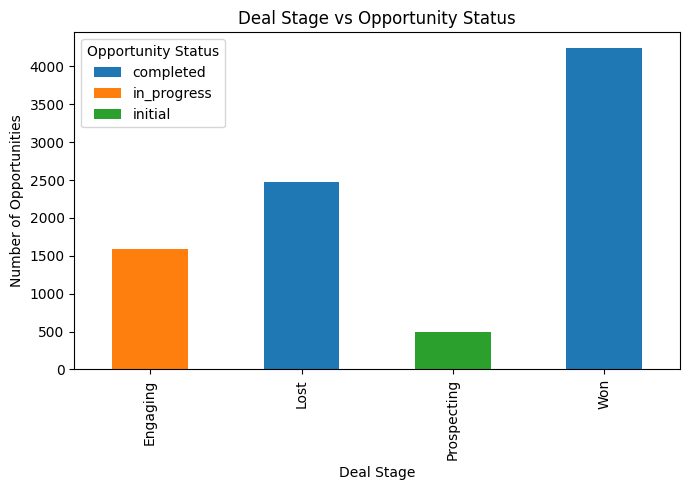

In [ ]:
crosstab_df = pd.crosstab(
    data_sales_pipeline['deal_stage'], data_sales_pipeline['opportunity_status'])

crosstab_df.plot(kind='bar', stacked=True, figsize=(7, 5))
plt.title('Deal Stage vs Opportunity Status')
plt.xlabel('Deal Stage')
plt.ylabel('Number of Opportunities')
plt.legend(title='Opportunity Status')
plt.tight_layout()
plt.show()


#### **Deal Stage vs. Opportunity Status – Discussion Notes**

The crosstab above reveals a misalignment between the CRM-labeled `deal_stage` and the actual state of the opportunity based on dates.

- `Prospecting` matches perfectly with `initial` (500 rows) → as expected.
- `Won` and `Lost` align with `completed`, which makes sense because both imply a final outcome.
- But `Engaging` is fully labeled as `in_progress`, and **none** are marked as `completed`, even though we would expect some of them to have been closed by now.

#### **Implications**
- There may be inconsistencies in how sales agents update `deal_stage`. It’s possible that some deals were closed but the stage was never updated from `Engaging` to `Won` or `Lost`.
- Our `opportunity_status` column reflects the actual data available (based on `engage_date` and `close_date`), making it more reliable for modeling purposes.

#### **Options for the team:**
1. **Rely on `opportunity_status`** (date-based) for filtering and training the model, since it reflects actual data.
2. Use `deal_stage` as an **additional feature** (not as a filter) to enrich the model, especially in the MVP version.
3. **Create a combined or corrected status** field that integrates both sources (e.g., if `close_date` exists but `deal_stage` is still "Engaging", flag it as inconsistent).
4. Flag and review rows where `deal_stage` seems outdated given the dates, as part of a data quality step.

#### **Decision to make**
We should agree as a team whether to:
- Train models using only `opportunity_status == 'completed'`
- Include `in_progress` or `initial` records for some models (like early prediction)
- Consider fixing or cleaning `deal_stage` manually if time allows

#### **Additional observation: close_date and close_value**

It's worth noting that the number of missing values in `close_date` and `close_value` is exactly the same (2089 rows). This suggests a direct link: when a deal hasn't been closed (`close_date` is NaT), its value is also unknown (`close_value` is NaN).

This further supports our classification logic:
- If both dates are missing → the opportunity is likely still in the initial stage.
- If `engage_date` exists but `close_date` and `close_value` are missing → the opportunity is in progress.
- If both dates exist → the opportunity is completed, with a known value.

This pattern reinforces the reliability of the `opportunity_status` column for modeling.


### Account

In [ ]:
data_sales_pipeline['account'].isna().sum()


np.int64(1425)

In [ ]:
# Check what deal_stage those missing accounts belong to
print("\nDeal Stage distribution for missing 'account':")
data_sales_pipeline[data_sales_pipeline['account'].isna()
                    ]['deal_stage'].value_counts()



Deal Stage distribution for missing 'account':


deal_stage
Engaging       1088
Prospecting     337
Name: count, dtype: int64

In [ ]:
# Check what opportunity_status those missing accounts belong to
print("\nOpportunity Status distribution for missing 'account':")
data_sales_pipeline[data_sales_pipeline['account'].isna(
)]['opportunity_status'].value_counts()



Opportunity Status distribution for missing 'account':


opportunity_status
in_progress    1088
initial         337
Name: count, dtype: int64

In [ ]:
data_sales_pipeline['has_account'] = data_sales_pipeline['account'].notna()


In [ ]:
data_sales_pipeline.head()


,opportunity_id,sales_agent,product,account,deal_stage,engage_date,close_date,close_value,opportunity_status,has_account
0,1C1I7A6R,Moses Frase,GTX Plus Basic,Cancity,Won,2016-10-20,2017-03-01,1054.0,completed,True
1,Z063OYW0,Darcel Schlecht,GTXPro,Isdom,Won,2016-10-25,2017-03-11,4514.0,completed,True
2,EC4QE1BX,Darcel Schlecht,MG Special,Cancity,Won,2016-10-25,2017-03-07,50.0,completed,True
3,MV1LWRNH,Moses Frase,GTX Basic,Codehow,Won,2016-10-25,2017-03-09,588.0,completed,True
4,PE84CX4O,Zane Levy,GTX Basic,Hatfan,Won,2016-10-25,2017-03-02,517.0,completed,True


In [ ]:
pd.crosstab(data_sales_pipeline['opportunity_status'],
            data_sales_pipeline['has_account'])


has_account,False,True
opportunity_status,,
completed,0,6711
in_progress,1088,501
initial,337,163


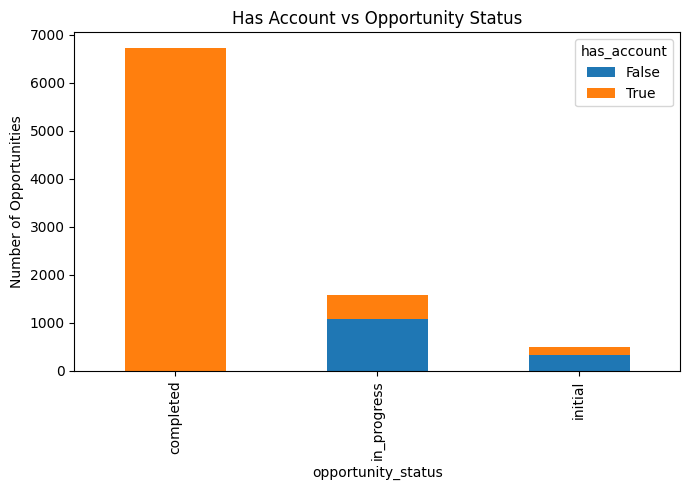

In [ ]:
pd.crosstab(data_sales_pipeline['opportunity_status'], data_sales_pipeline['has_account']) \
  .plot(kind='bar', stacked=True, figsize=(7, 5))
plt.title('Has Account vs Opportunity Status')
plt.ylabel('Number of Opportunities')
plt.tight_layout()
plt.show()


#### **Observations and Options – Missing Account**
A total of 1,425 opportunities are missing an associated account.
All of them fall into early sales stages (Prospecting and Engaging) and are labeled as either initial or in_progress in opportunity_status.
    *This means they do not affect completed sales, as all completed deals have an account assigned.

**Implications:**

These opportunities can be kept in the dataset if we want to build models or analyses involving early-stage predictions.
If we plan to enrich the dataset by joining with data_accounts, we should be aware that these rows won't match.

**Options for the team:**

    -Keep them as-is, especially if early-stage modeling is relevant.
    -Create a boolean column like has_account = True/False to capture this signal and use it as a feature.
    -Filter them out temporarily using ~data_sales_pipeline['account'].isna() if we need full rows for joins or     feature engineering.
    -Optionally, review them separately as a "pre-qualification" group that may require follow-up from the business side.

#### **Consistency Between Deal Stage and Opportunity Status**
Interestingly, when we look at the 1,425 opportunities missing an account, we notice a perfect match between deal_stage and our custom opportunity_status:

All rows with deal_stage == "Engaging" are labeled as in_progress.
All rows with deal_stage == "Prospecting" are labeled as initial.

This confirms the reliability of our opportunity_status column, especially for early-stage opportunities.
It also suggests that, at least in these cases, the deal_stage field is consistent with the actual data (dates).

However, we previously saw that this alignment breaks for some rows with Engaging that have a close_date, which are still labeled in_progress in deal_stage.

This insight supports the idea of relying primarily on opportunity_status for modeling and using deal_stage as a secondary or supporting feature, while also flagging inconsistencies where needed.

**Now that we have clarified how account availability aligns with opportunity progress, we can proceed to explore the sales_agent and team-related information to further enrich our modeling dataset**